#### Time Series EDA

#### Topics

- Pandas data reader
- Date Time Index
- Time Resampling
- Time Shifts
- Mean Rolling and Expanding
- Time Series Visualization
- One Sample Project on Time Series

In [1]:
import pandas_datareader.data as pdr
import pandas as pd
import datetime as dt

In [3]:
pdr.get_data_yahoo('TSLA')

AttributeError: 'NoneType' object has no attribute 'group'

In [6]:
df = pdr.DataReader('TSLA', 'yahoo', start='2019-09-10', end='2019-10-09')

AttributeError: 'NoneType' object has no attribute 'group'

In [7]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.5 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 2.3 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 2.6 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with sta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import yfinance as yf

In [4]:
df_tesla = yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [5]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [6]:
df_tesla.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-05-28,356.899994,365.000000,355.910004,364.839996,91404300
2025-05-29,358.429993,367.709991,356.000000,365.290009,88545700
2025-05-30,346.459991,363.679993,345.290009,355.519989,123474900
2025-06-02,342.690002,348.019989,333.329987,343.500000,81873800
2025-06-03,344.269989,355.399994,343.040009,346.595001,97444516


<Axes: xlabel='Date'>

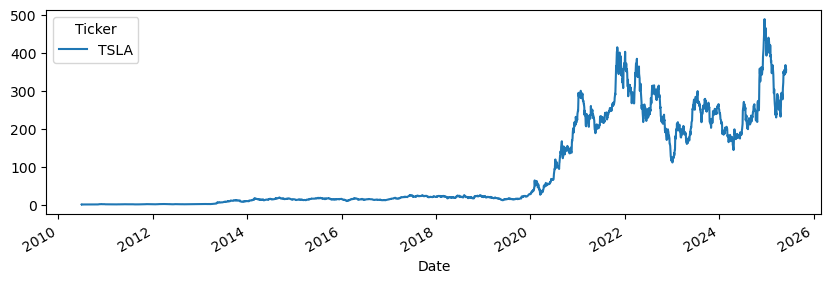

In [9]:
df_tesla['High'].plot(figsize=(10, 3))

<Axes: xlabel='Date'>

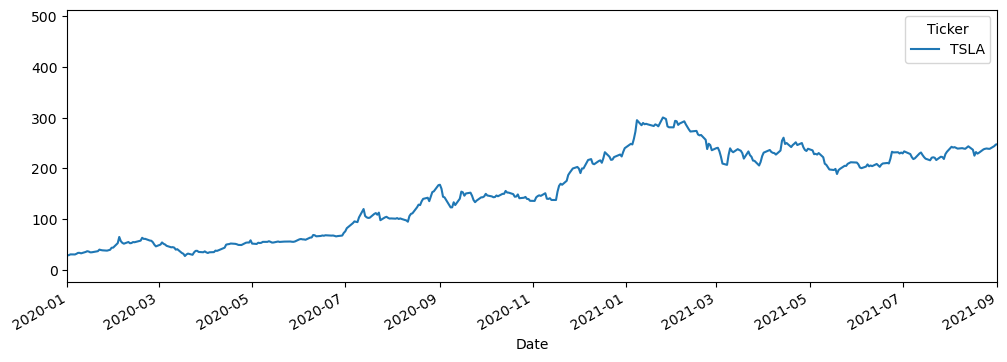

In [12]:
## xlimit and ylimit
df_tesla['High'].plot(xlim = ('2020-01-01', '2021-09-01'), figsize=(12, 4))

<Axes: xlabel='Date'>

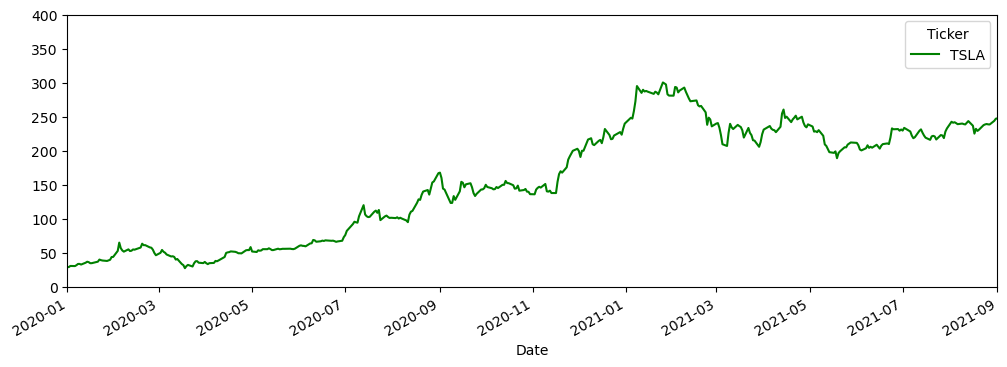

In [17]:
## xlimit and ylimit
df_tesla['High'].plot(xlim = ['2020-01-01', '2021-09-01'], ylim=[0, 400], figsize=(12, 4), c='green')

In [19]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2025-05-20', '2025-05-21', '2025-05-22', '2025-05-23',
               '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30',
               '2025-06-02', '2025-06-03'],
              dtype='datetime64[ns]', name='Date', length=3756, freq=None)

In [22]:
#Row location
index = df_tesla.loc['2020-01-01': '2021-10-01'].index
share_open=df_tesla.loc['2020-01-01': '2021-10-01']['Open']

In [23]:
share_open

Ticker,TSLA
Date,
2020-01-02,28.299999
2020-01-03,29.366667
2020-01-06,29.364668
2020-01-07,30.760000
2020-01-08,31.580000
...,...
2021-09-27,257.706665
2021-09-28,262.399994
2021-09-29,259.933319


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
figure,axis=plt.subplots()
axis.plot(index, share_open)

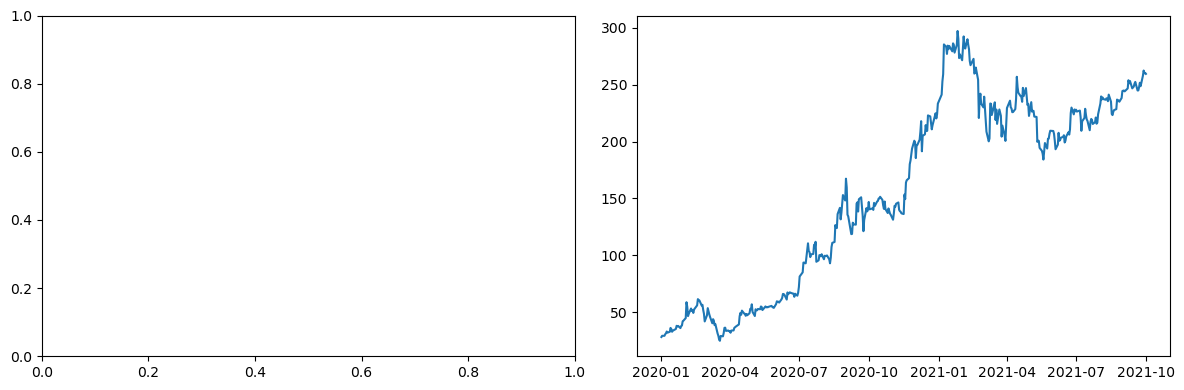

In [39]:
plt.subplots(1,2, figsize=(12,4))
plt.plot(index, share_open)
plt.tight_layout()
plt.show()

## datatime index

In [48]:
from datetime import datetime as dt

In [41]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3756 entries, 2010-06-29 to 2025-06-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3756 non-null   float64
 1   (High, TSLA)    3756 non-null   float64
 2   (Low, TSLA)     3756 non-null   float64
 3   (Open, TSLA)    3756 non-null   float64
 4   (Volume, TSLA)  3756 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 305.1 KB


In [42]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [43]:
df_tesla=df_tesla.reset_index() #always change date column from object dtype to datatime dtype

In [44]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3756 non-null   datetime64[ns]
 1   (Close, TSLA)   3756 non-null   float64       
 2   (High, TSLA)    3756 non-null   float64       
 3   (Low, TSLA)     3756 non-null   float64       
 4   (Open, TSLA)    3756 non-null   float64       
 5   (Volume, TSLA)  3756 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 176.2 KB


In [63]:
df_tesla=df_tesla.set_index('Date')

KeyError: "None of ['Date'] are in the columns"

In [64]:
df_tesla

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-05-28,356.899994,365.000000,355.910004,364.839996,91404300
2025-05-29,358.429993,367.709991,356.000000,365.290009,88545700


In [51]:
dt.now()

datetime.datetime(2025, 6, 4, 1, 13, 52, 992865)

## TIME RESAMPLING

#### 🍬 Step 1: The Jelly Bean Story (What is resampling?)
You have 1 jelly bean for every hour of the day.

So, your jar looks like this:

| Time     | Jelly Beans |
| -------- | ----------- |
| 8:00 AM  | 5           |
| 9:00 AM  | 7           |
| 10:00 AM | 4           |
| ...      | ...         |
| 5:00 PM  | 6           |

Now, let’s say you want to know:

How many jelly beans you got per day instead of per hour?

This is called resampling.

So instead of showing hourly data, you want to change it into daily data.

👶 Imagine This...
You used to count jelly beans every hour.

Now, you want to sum all jelly beans in a day and just show the daily total.

That’s resampling — changing the time scale of your data!

🐼 In Pandas (the real thing)
Pandas lets you do this with .resample().

Here’s a simple example:

"""
import pandas as pd

#Let's say this is our hourly jelly bean data
data = {
    'Time': pd.date_range(start='2024-01-01 08:00', periods=6, freq='H'),
    'JellyBeans': [5, 7, 4, 6, 3, 8]
}

df = pd.DataFrame(data)
df.set_index('Time', inplace=True)

#Resample to daily total
daily_total = df.resample('D').sum()

print(daily_total)
"""

### ⏳ What 'D', 'H', 'W' mean

| Code  | Time Unit | Example Use               |
| ----- | --------- | ------------------------- |
| `'H'` | Hourly    | Resample to 1-hour chunks |
| `'D'` | Daily     | Resample to 1 day         |
| `'W'` | Weekly    | Resample to 1 week        |
| `'M'` | Monthly   | Resample to 1 month       |

### 💡 Some common operations with resampling:
python
Copy
Edit
df.resample('D').sum()      # Total per day
df.resample('D').mean()     # Average per day
df.resample('D').max()      # Highest per day
df.resample('W').sum()      # Total per week

### 📦 Baby Summary:
Resampling in pandas is like changing how often you count your jelly beans — every hour, every day, or every week. And then you decide what to do with them (sum, average, etc.)

In [52]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [53]:
df_tesla.resample(rule='A').min()

C:\Users\USER\AppData\Local\Temp\ipykernel_21980\2338822268.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A').min()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-12-31,1.053333,1.108667,0.998667,1.076000,1777500
2011-12-31,1.455333,1.484667,1.407333,1.452000,3594000
2012-12-31,1.519333,1.790000,1.509333,1.774667,5473500
2013-12-31,2.194000,2.225333,2.140667,2.205333,6603000
2014-12-31,9.289333,9.800000,9.111333,9.366667,19983000
2015-12-31,12.333333,12.619333,12.093333,12.388667,10620000
2016-12-31,9.578000,10.331333,9.403333,9.488000,24892500
2017-12-31,14.466000,14.688667,14.064000,14.316667,32800500


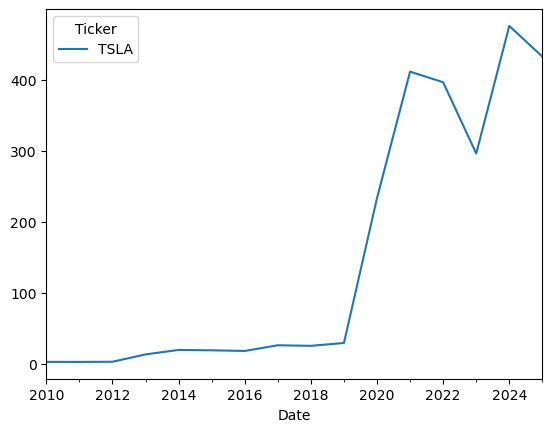

In [61]:
# "YE" YEAR END FREQUENCY
df_tesla.resample(rule='YE').max()['Open'].plot()
plt.show()

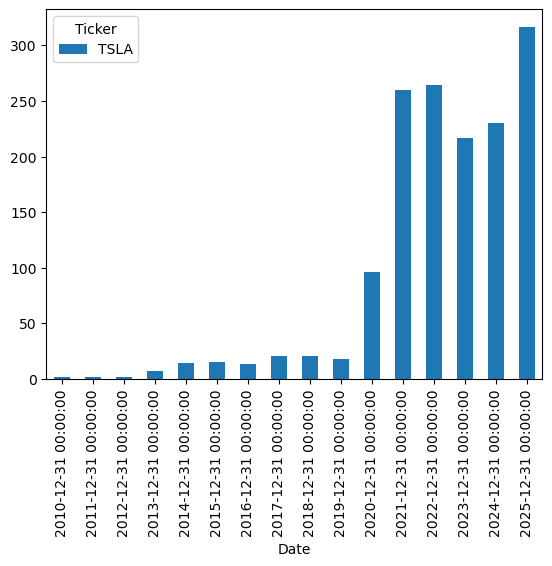

In [66]:
# "YE" YEAR END FREQUENCY
df_tesla.resample(rule='YE').mean()['Open'].plot(kind='bar')
plt.show()

#### ROLLING AND EXPANDING

#### 🛼 ROLLING: Like a sliding window!
🍞 Imagine a loaf of sliced bread
Let’s say you’re hungry and want to make a sandwich, but you only want to look at 3 slices at a time.

You slide your hand along the loaf, grabbing 3 slices each time.

This is exactly what rolling does:

It looks at a fixed number of rows (a “window”) and slides forward one by one.

Example: Rolling Average (3 slices/window)
If we have jelly beans like this:

Day 1 → 2 beans  
Day 2 → 4 beans  
Day 3 → 6 beans  
Day 4 → 8 beans  
Day 5 → 10 beans

A 3-day rolling average will be:

| Days  | Avg of last 3 days |
| ----- | ------------------ |
| Day 1 | NaN (not enough)   |
| Day 2 | NaN (need 3 days)  |
| Day 3 | (2+4+6)/3 = 4.0    |
| Day 4 | (4+6+8)/3 = 6.0    |
| Day 5 | (6+8+10)/3 = 8.0   |

In pandas:
"""
df['RollingAvg'] = df['Beans'].rolling(window=3).mean()
"""

#### 🧨 EXPANDING: Like collecting from day 1 till now!
🪣 Imagine a bucket that never gets emptied
Every day, you drop more jelly beans into your bucket.
The bucket keeps getting fuller — and you keep measuring what's inside from Day 1 to today.

That’s what expanding does:

It starts from the first row and keeps adding more with each step.

Example: Expanding Average
Same jelly beans:

Day 1: 2  
Day 2: 4  
Day 3: 6  
Day 4: 8  
Day 5: 10

Expanding average would be:

| Day | Expanding Mean     |
| --- | ------------------ |
| 1   | 2                  |
| 2   | (2+4)/2 = 3        |
| 3   | (2+4+6)/3 = 4      |
| 4   | (2+4+6+8)/4 = 5    |
| 5   | (2+4+6+8+10)/5 = 6 |

In pandas:
"""
df['ExpandAvg'] = df['Beans'].expanding().mean()
"""

🎯 Baby Summary:

| Concept   | What It Does                                 | Key Idea                           |
| --------- | -------------------------------------------- | ---------------------------------- |
| Rolling   | Fixed-size sliding window over time          | Look at a **fixed number** of rows |
| Expanding | Growing window from the beginning to current | Look at **everything from start**  |


In [68]:
df_tesla['High'].rolling(3).mean()

Ticker,TSLA
Date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,1.807556
2010-07-02,1.765333
2010-07-06,1.533778
...,...
2025-05-28,357.323334
2025-05-29,365.500000
2025-05-30,365.463328


In [69]:
df_tesla['Open 30 days rolling']= df_tesla['Open'].rolling(30).mean()

In [70]:
df_tesla

Price,Close,High,Low,Open,Volume,Open 30 days rolling
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,NaN
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,NaN
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,NaN
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,NaN
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,NaN
...,...,...,...,...,...,...
2025-05-28,356.899994,365.000000,355.910004,364.839996,91404300,295.820999
2025-05-29,358.429993,367.709991,356.000000,365.290009,88545700,299.666999


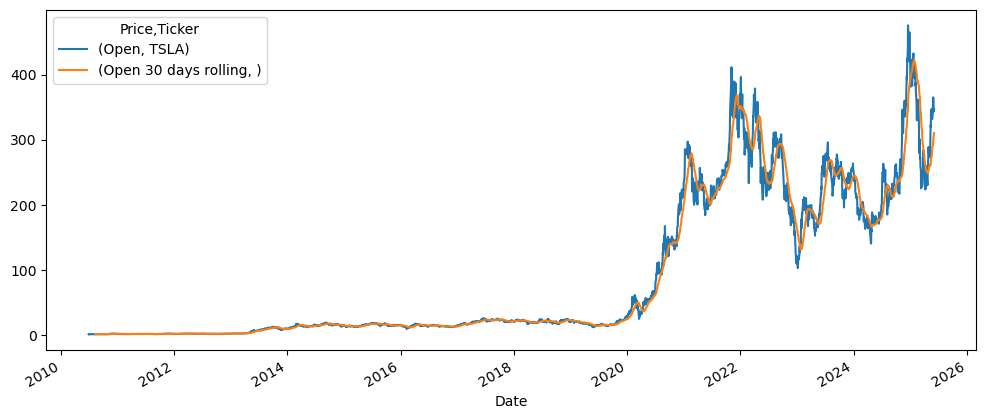

In [71]:
df_tesla[['Open', 'Open 30 days rolling']].plot(figsize=(12, 5))
plt.show()

### ASSIGNMENT
- Read the Microsoft Data from pandas Data reader
- Get the maximum price of the share from 2017 to 2022
- which is the date of the highest price of the stock?
- which is the date of the lowest price of the stock?
- check the news of the date just to see what happened.